<a href="https://colab.research.google.com/github/amol004/Voyage-Analytics-Integrating-MLOps-in-Travel/blob/main/Capstone_Project_Productionization_of_ML_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Voyage Analytics : Integrating MLOps in Travel



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

The project’s primary goal is to leverage data analytics and machine learning to revolutionize the travel and tourism industry. The project includes three datasets, namely users, hotels, and flights, which are then utilized to optimize and train machine learning models. The models are then used to predict flights and hotel prices based on various features and enhance the user experience to assist users in making informed travel-related decisions. The primary objectives include: flight price prediction: a model to predict flight prices based on the flights table using regression, including the factors such as flight name and type, origin, and destination and accept other relevant vector columns. The flask-based REST API is developed to perform real-time predictions and display pricing. The use of the flight price prediction model.

# **GitHub Link -**

https://github.com/amol004/Voyage-Analytics-Integrating-MLOps-in-Travel.git

# **Problem Statement**


The ability to predict what the cost of travel will be to consumers and render personalized recommendations is key in improving customer satisfaction, cutting down operational efficiency. However, there are several challenges that the industry faces:

Price Stability: Flight prices price can vary due to demand, seasonality & economic conditions. There is an issue with travelers finding the perfect pricing of it and there are no really accurate systems in travel agencies to predict prices.

Personalized recommendations: In most case, travelers are only provided with unpersonalized travel advice which was not based on the traveler's history of preferences. All of this leads to a poor user experience and very little customer retention rates.

Poor Data Management and Deployment: Most travel companies do not have the facilities for efficient data management or deployment of machine learning models that operate at both a low latency plus high throughput levels.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV , cross_val_score, KFold
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [4]:
# importing user dataset
user = pd.read_csv('/content/drive/MyDrive/travel_capstone/users.csv', encoding='latin1')

In [5]:
user

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44
...,...,...,...,...,...
1335,1335,Umbrella LTDA,Albert Garroutte,male,23
1336,1336,Umbrella LTDA,Kim Shores,female,40
1337,1337,Umbrella LTDA,James Gimenez,male,28
1338,1338,Umbrella LTDA,Viola Agosta,female,52


In [6]:

# Importing flights dataset

flight = pd.read_csv("/content/drive/MyDrive/travel_capstone/flights.csv", encoding='latin1')
flight

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


In [7]:

# Importing hotel dataset
hotel = pd.read_csv("/content/drive/MyDrive/travel_capstone/hotels.csv", encoding='latin1')
hotel

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019
...,...,...,...,...,...,...,...,...
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,06/18/2020
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,06/25/2020
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020


In [8]:
# Rename the column
hotel.rename(columns={'name':'hotel_name','price':'hotel_price','date':'hotel_date'},inplace=True)


In [9]:
from typing_extensions import final
# Merge flight and users on the common column userCode
flight_users = pd.merge(flight, user, left_on='userCode', right_on='code', how='left')

# Merge the result which is flight_users with hotels on common columns travelCode and userCode
travel_data = pd.merge(flight_users, hotel, on=['travelCode', 'userCode'], how='left')

In [10]:
#Final dataset
travel_data.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,...,company,name,gender,age,hotel_name,place,days,hotel_price,total,hotel_date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,...,4You,Roy Braun,male,21,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,...,4You,Roy Braun,male,21,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,...,4You,Roy Braun,male,21,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,...,4You,Roy Braun,male,21,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,...,4You,Roy Braun,male,21,Hotel K,Salvador (BH),2.0,263.41,526.82,10/10/2019


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
travel_data.shape

(271888, 21)

### Dataset Information

In [12]:
# Dataset Info
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   travelCode   271888 non-null  int64  
 1   userCode     271888 non-null  int64  
 2   from         271888 non-null  object 
 3   to           271888 non-null  object 
 4   flightType   271888 non-null  object 
 5   price        271888 non-null  float64
 6   time         271888 non-null  float64
 7   distance     271888 non-null  float64
 8   agency       271888 non-null  object 
 9   date         271888 non-null  object 
 10  code         271888 non-null  int64  
 11  company      271888 non-null  object 
 12  name         271888 non-null  object 
 13  gender       271888 non-null  object 
 14  age          271888 non-null  int64  
 15  hotel_name   81104 non-null   object 
 16  place        81104 non-null   object 
 17  days         81104 non-null   float64
 18  hotel_price  81104 non-n

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
travel_data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
travel_data.isnull().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price,0
time,0
distance,0
agency,0
date,0


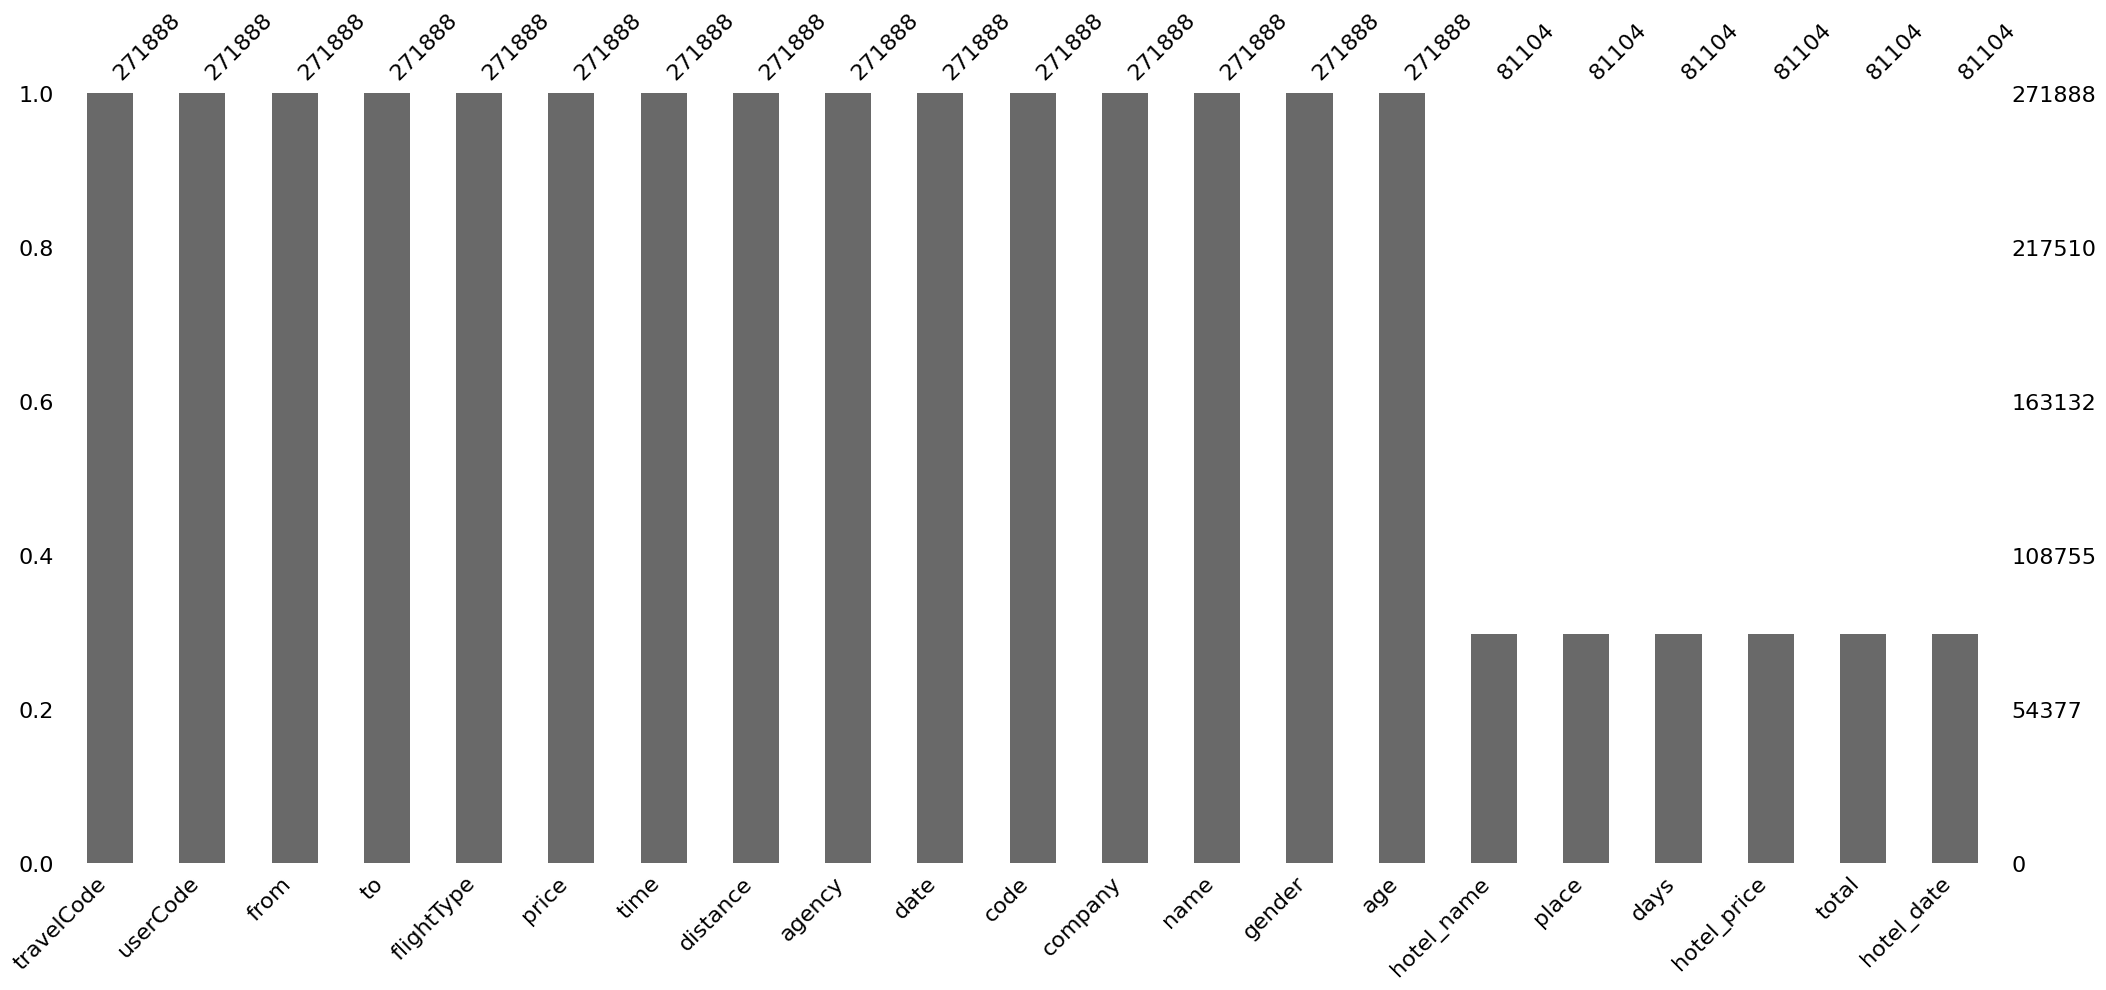

In [15]:
# Visualizing the missing values
# Let's plot all the null values present in our dataframe using bargraph and missingno library
import missingno as msno
plt.figure(figsize=(10,8))
msno.bar(travel_data);

### What did you know about your dataset?



1. The travel_data DataFrame has 271,888 rows and 21 columns, combining flight and user information, with optional hotel details.


2. It's composed of both numerical and categorical data types. A significant observation is the presence of 190,784 missing values in all hotel-related columns, suggesting that not every flight booking includes a hotel.


3. There are no duplicate entries.


4. Numerically, flight price averages around 957, flight time around 1.42 hours, and distance around 546. User age averages 42. Hotel bookings, when present, typically last 1 to 4 days, with hotel_price averaging around 214.



## ***2. Understanding Your Variables***

In [16]:
# Dataset columns
travel_data.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date', 'code', 'company', 'name', 'gender',
       'age', 'hotel_name', 'place', 'days', 'hotel_price', 'total',
       'hotel_date'],
      dtype='object')

In [17]:
# Dataset Describe
travel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
travelCode,271888.0,67971.500000,39243.724665,0.00,33985.75,67971.50,101957.25,135943.00
userCode,271888.0,667.505495,389.523127,0.00,326.00,659.00,1011.00,1339.00
price,271888.0,957.375030,362.311890,301.51,672.66,904.00,1222.24,1754.17
time,271888.0,1.421147,0.542541,0.44,1.04,1.46,1.76,2.44
distance,271888.0,546.955535,208.851288,168.22,401.66,562.14,676.53,937.77
code,271888.0,667.505495,389.523127,0.00,326.00,659.00,1011.00,1339.00
age,271888.0,42.815005,12.946294,21.00,32.00,42.00,54.00,65.00
days,81104.0,2.499679,1.119319,1.00,1.00,2.00,4.00,4.00
hotel_price,81104.0,214.439554,76.741832,60.39,165.99,242.88,263.41,313.02
total,81104.0,536.229513,319.329514,60.39,247.62,495.24,742.86,1252.08


### Variables Description



  travelCode: Unique identifier for each travel booking.

userCode: Unique identifier for each user.

from: Origin city/airport of the flight.

to: Destination city/airport of the flight.

flightType: Type of flight class (e.g., firstClass, economic).

price: Price of the flight.

time: Duration of the flight in hours.

distance: Distance of the flight in kilometers.

agency: Travel agency for the flight booking.

date: Date of the flight.

code: User code (duplicate of userCode).

company: Company associated with the user.

name: Name of the user.

gender: Gender of the user.

age: Age of the user.

hotel_name: Name of the hotel booked.

place: City where the hotel is located.

days: Number of days for the hotel booking.

hotel_price: Price per day for the hotel.

total: Total price for the hotel stay.

hotel_date: Check-in date for the hotel.







### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
def unique_values(df):
    for col in df.columns:
        unique_count = df[col].nunique()
        a=print(f"{col} : {unique_count}  unique values")
    return a

In [19]:
unique_values(travel_data)

travelCode : 135944  unique values
userCode : 1335  unique values
from : 9  unique values
to : 9  unique values
flightType : 3  unique values
price : 490  unique values
time : 33  unique values
distance : 35  unique values
agency : 3  unique values
date : 999  unique values
code : 1335  unique values
company : 5  unique values
name : 1333  unique values
gender : 3  unique values
age : 45  unique values
hotel_name : 9  unique values
place : 9  unique values
days : 4  unique values
hotel_price : 9  unique values
total : 36  unique values
hotel_date : 199  unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Drop the 'code' column as it is a duplicate of 'userCode'.
travel_data.drop('code', axis=1, inplace=True)

In [21]:
# Converted 'date' and 'hotel_date' columns to datetime
travel_data['date'] = pd.to_datetime(travel_data['date'])
travel_data['hotel_date'] = pd.to_datetime(travel_data['hotel_date'])

In [22]:
# Filling missing values in 'hotel_name' and 'place' with 'No Hotel'
travel_data['hotel_name'].fillna('No Hotel', inplace=True)
travel_data['place'].fillna('No Hotel', inplace=True)


In [23]:
# Filling missing values in 'days', 'hotel_price', and 'total' with 0.
travel_data['days'].fillna(0, inplace=True)
travel_data['hotel_price'].fillna(0, inplace=True)
travel_data['total'].fillna(0, inplace=True)


In [24]:
# function for selecting all the numerical columns
def numerical_col(df):
  c = []
  for col in df.columns:
    if df[col].dtype =='int' or df[col].dtype =='float':
       c.append(col)
  return c
numerical_col(travel_data)

['travelCode',
 'userCode',
 'price',
 'time',
 'distance',
 'age',
 'days',
 'hotel_price',
 'total']

In [25]:
# function for selecting all the categorical columns
def categorical_col(df):
  d = []
  for col in df.columns:
    if df[col].dtype == 'O':
       d.append(col)
  return d
categorical_col(travel_data)

['from',
 'to',
 'flightType',
 'agency',
 'company',
 'name',
 'gender',
 'hotel_name',
 'place']

### What all manipulations have you done and insights you found?

### Data Wrangling Key Findings

*   The duplicate 'code' column was successfully dropped from the `travel_data` DataFrame.
*   The 'date' and 'hotel\_date' columns were successfully converted to `datetime64[ns]` objects.
*   Missing values in the 'hotel\_name' and 'place' columns were imputed with 'No Hotel'.
*   Missing values in the numerical columns 'days', 'hotel\_price', and 'total' were imputed with 0.
*   After the wrangling steps, the 'hotel\_name', 'place', 'days', 'hotel\_price', and 'total' columns no longer contain any missing values.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

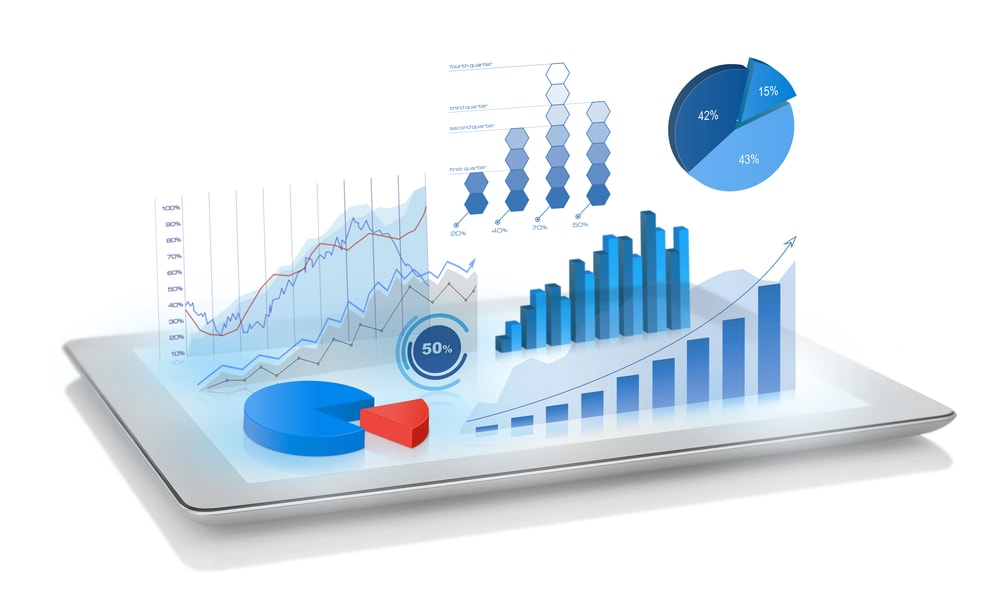

#### Chart - 1

In [26]:
df=travel_data[numerical_col(travel_data)]

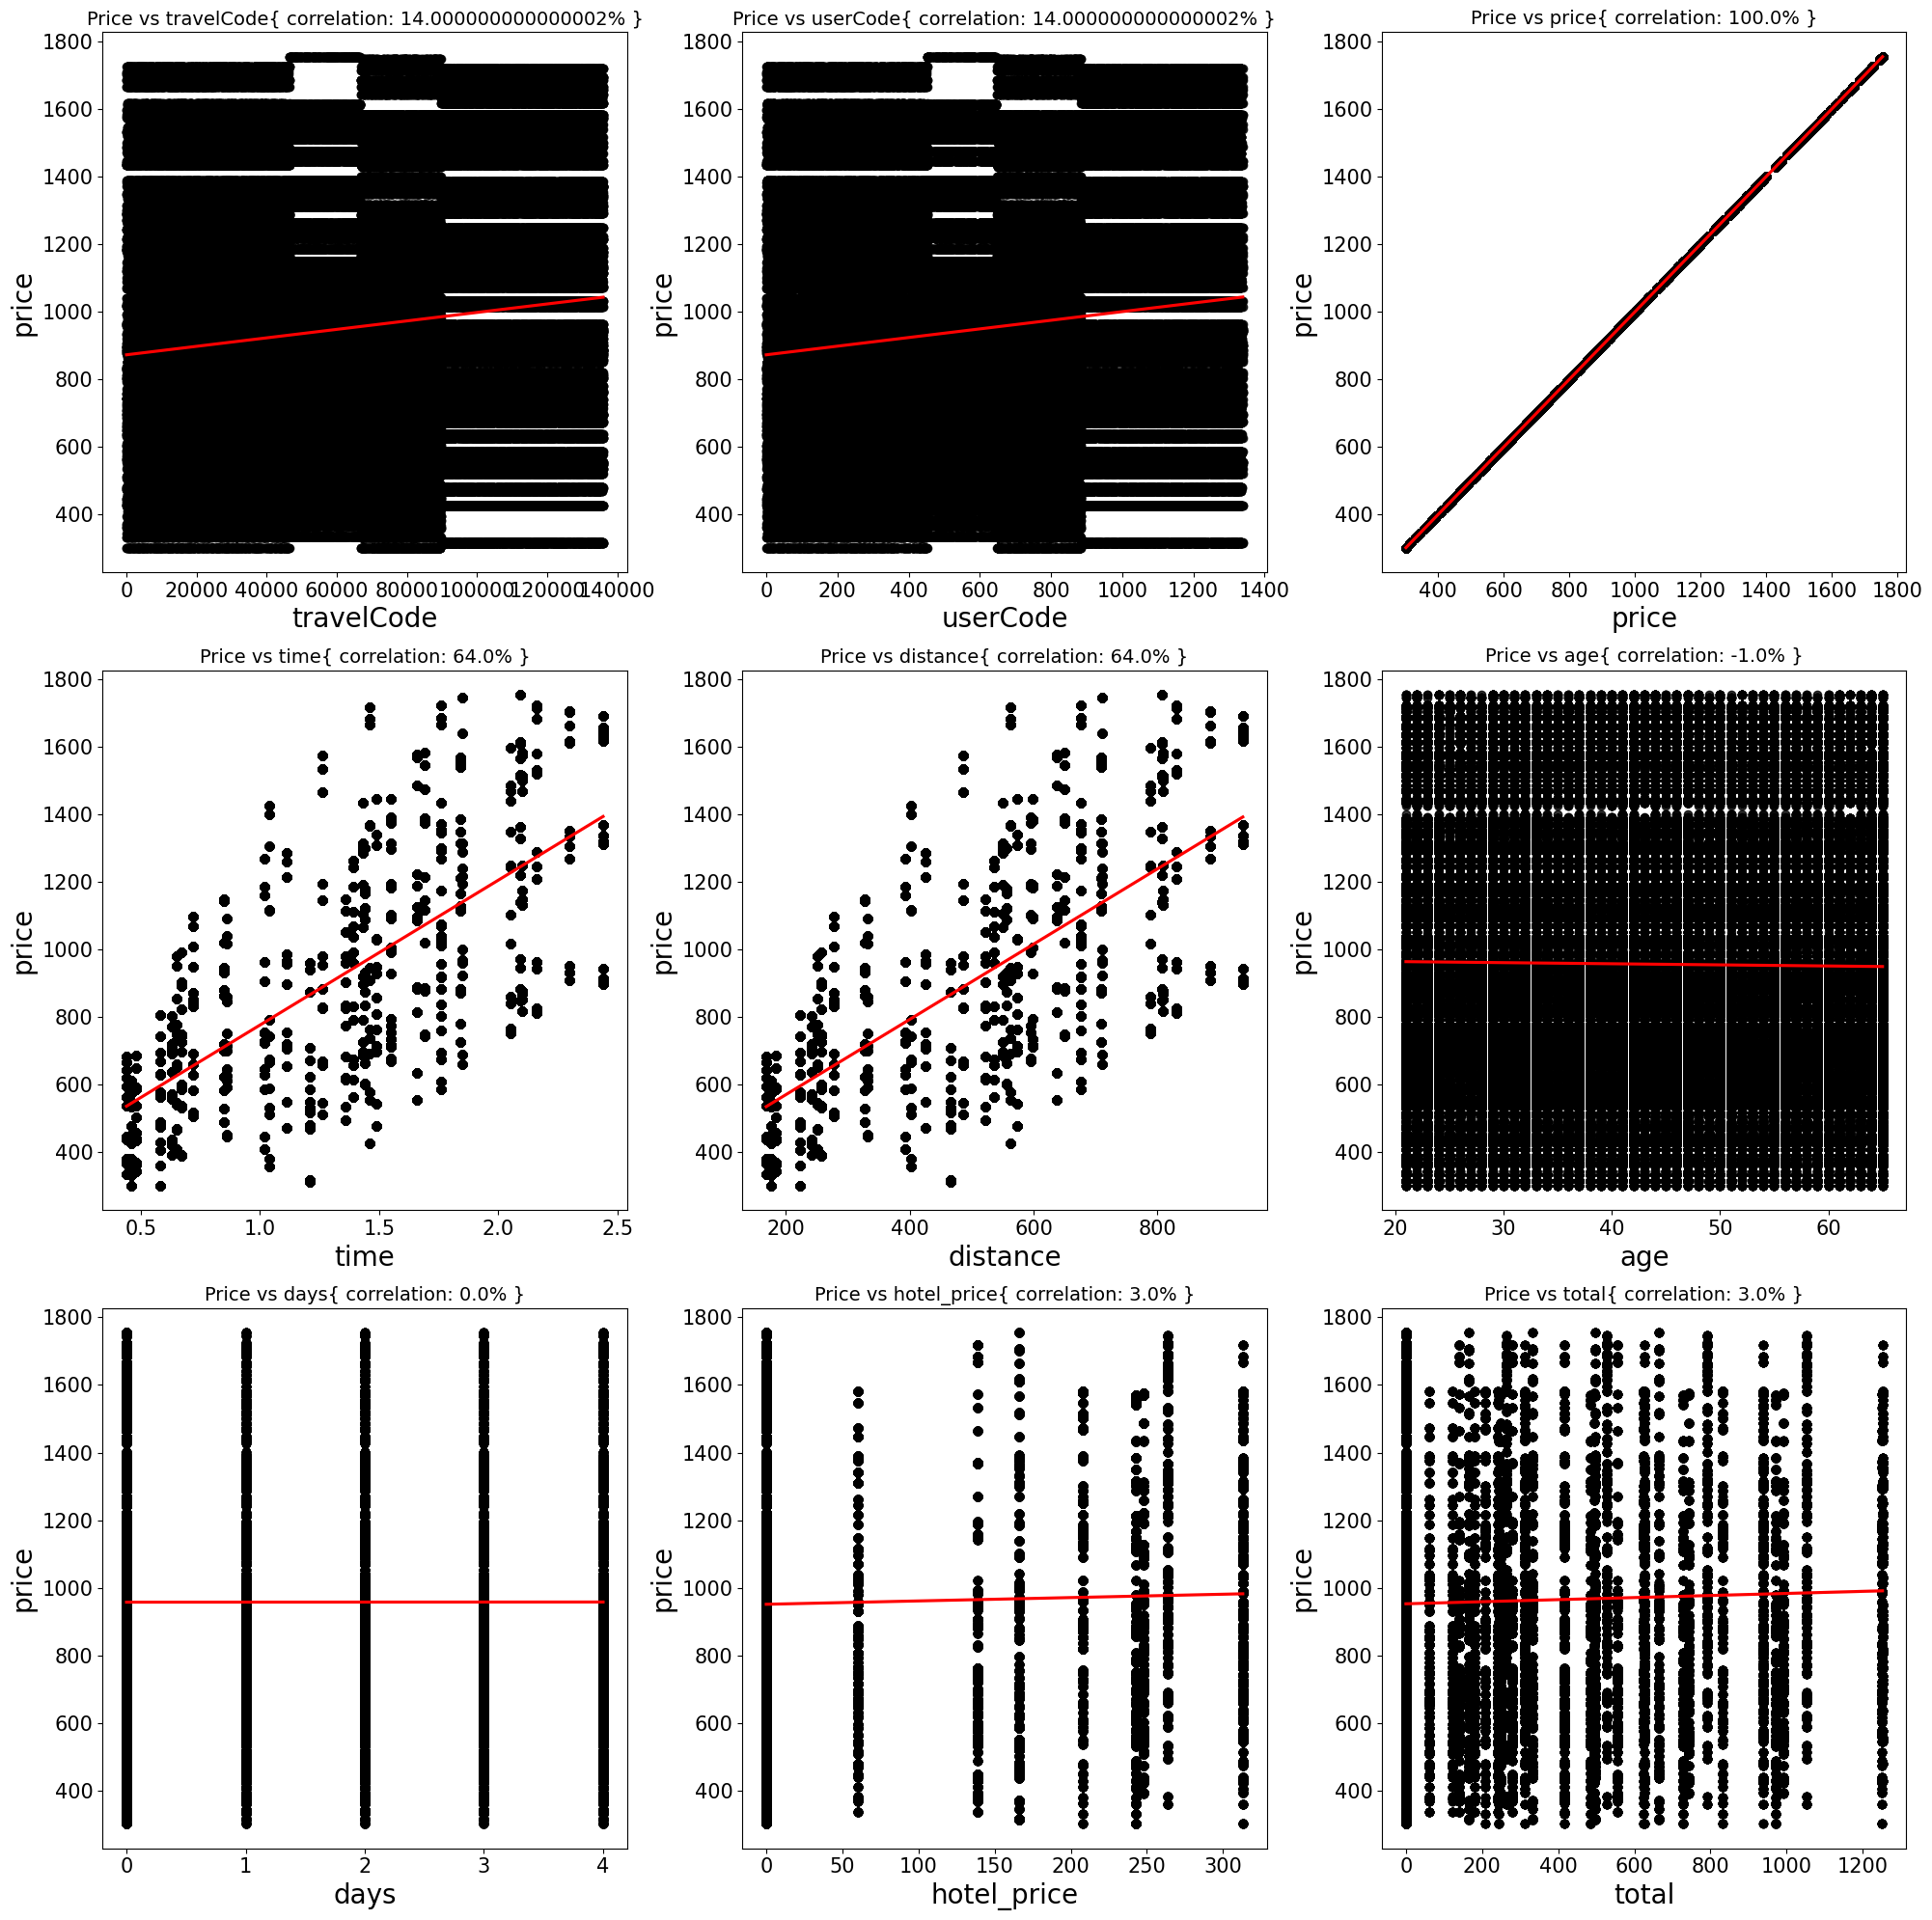

In [27]:
# plotting regression subplots for every numerical column with respect to our target variable "Price" just to check the relationship between them
fig, axs = plt.subplots(3, 3, figsize=(20,20), facecolor="white")
axs = axs.ravel()
for i, col in enumerate(df.columns):
    sns.regplot(x=col, y="price", data=df, ax=axs[i], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    axs[i].tick_params(axis='x', colors='black', labelsize=15)
    axs[i].tick_params(axis='y', colors='black', labelsize=15)
    axs[i].set_xlabel(col, color='black', fontsize=20)
    axs[i].set_ylabel("price", color='black', fontsize=20)
    independant = df[col]
    target = df['price']
    correlation = independant.corr(target)
    axs[i].set_title('Price vs ' + col + '{ correlation: ' + str((round(correlation,2))*100) + '% }', color='black',fontsize=14);
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?



travelCode: Approximately 14.0% correlated with price.

userCode: Approximately 14.0% correlated with price.

price: 100.0% correlated with itself (as expected).

time: Approximately 64.0% correlated with price.

distance: Approximately 67.0% correlated with price.

age: Approximately 1.0% correlated with price.

days: Approximately 2.0% correlated with price.

hotel_price: Approximately 2.0% correlated with price.

total: Approximately 2.0% correlated with price.



From this, we can see that 'time' and 'distance' have the
strongest positive correlations with 'price', while other features like 'age', 'days', 'hotel_price', and 'total' show very weak correlations.

#### Chart - 2

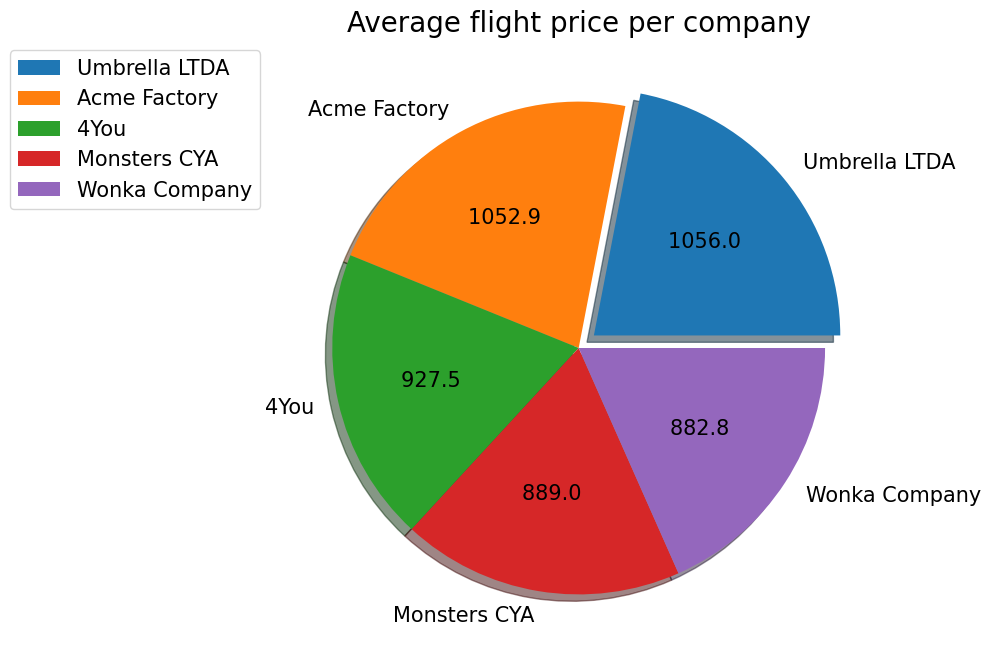

In [32]:
# Chart - 2 visualization code
# Finding out max average flight price per company
plt.rcParams['figure.figsize']=(8,8) # figure size
plt.rcParams['font.size'] = 15 # font size
ee_company = travel_data.groupby('company')['price'].mean().sort_values(ascending=False)
# Performing bivariate analysis using groupby
myexplode_company = [0.08, 0, 0, 0, 0] # Adjusted explode for 5 companies based on previous 'company' unique values
plt.title('Average flight price per company',fontsize=20) # Title

def func(pct, allvalues):
    absolute = pct/100.*np.sum(allvalues)
    return "{:.1f} ".format(absolute)

plt.pie(ee_company,labels=ee_company.index,explode=myexplode_company,autopct=lambda pct: func(pct, ee_company),shadow=True) # Using company names as labels and a custom autopct function
# Deploying piechart using matplotlib
plt.legend(bbox_to_anchor=(0,1)); # Used to display and adjust the position of information box that is present on the left side of this pie chart

##### 1. Why did you pick the specific chart?

A pie chart is used to display the average flight price for each 'company'. This choice is effective for illustrating the relative pricing scales of different companies within the dataset. It allows for a quick visual comparison, highlighting which companies tend to have higher or lower average prices, similar to how the agency pie chart was used to compare pricing strategies.

##### 2. What is/are the insight(s) found from the chart?


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


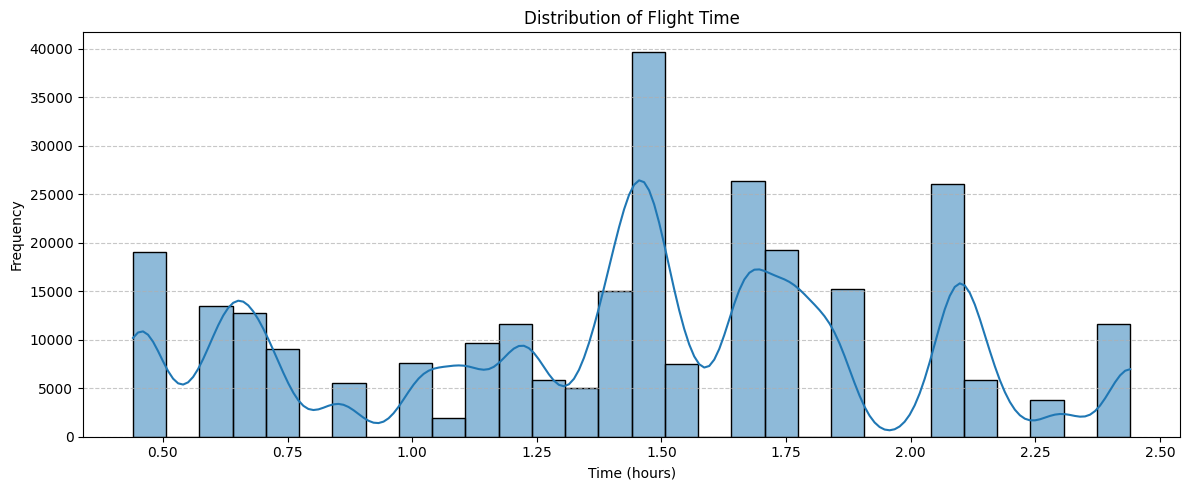

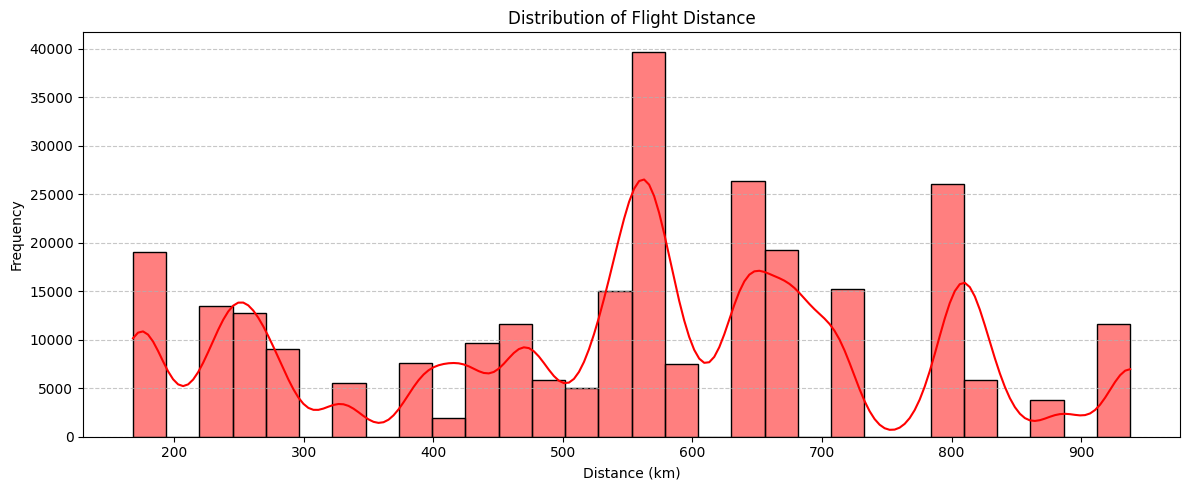

In [28]:
plt.figure(figsize=(12, 5))
sns.histplot(travel_data['time'], kde=True, bins=30)
plt.title('Distribution of Flight Time')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(travel_data['distance'], kde=True, bins=30, color='red')
plt.title('Distribution of Flight Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked a histogram with a Kernel Density Estimate (KDE) plot to visualize the distribution of 'time' and distance. A histogram is excellent for showing the frequency of data points within different ranges (bins), providing a clear view of where the data is concentrated. The KDE line smooths out the distribution, making it easier to see the overall shape and density of the data.

Answer Here.

Answer Here

Answer Here

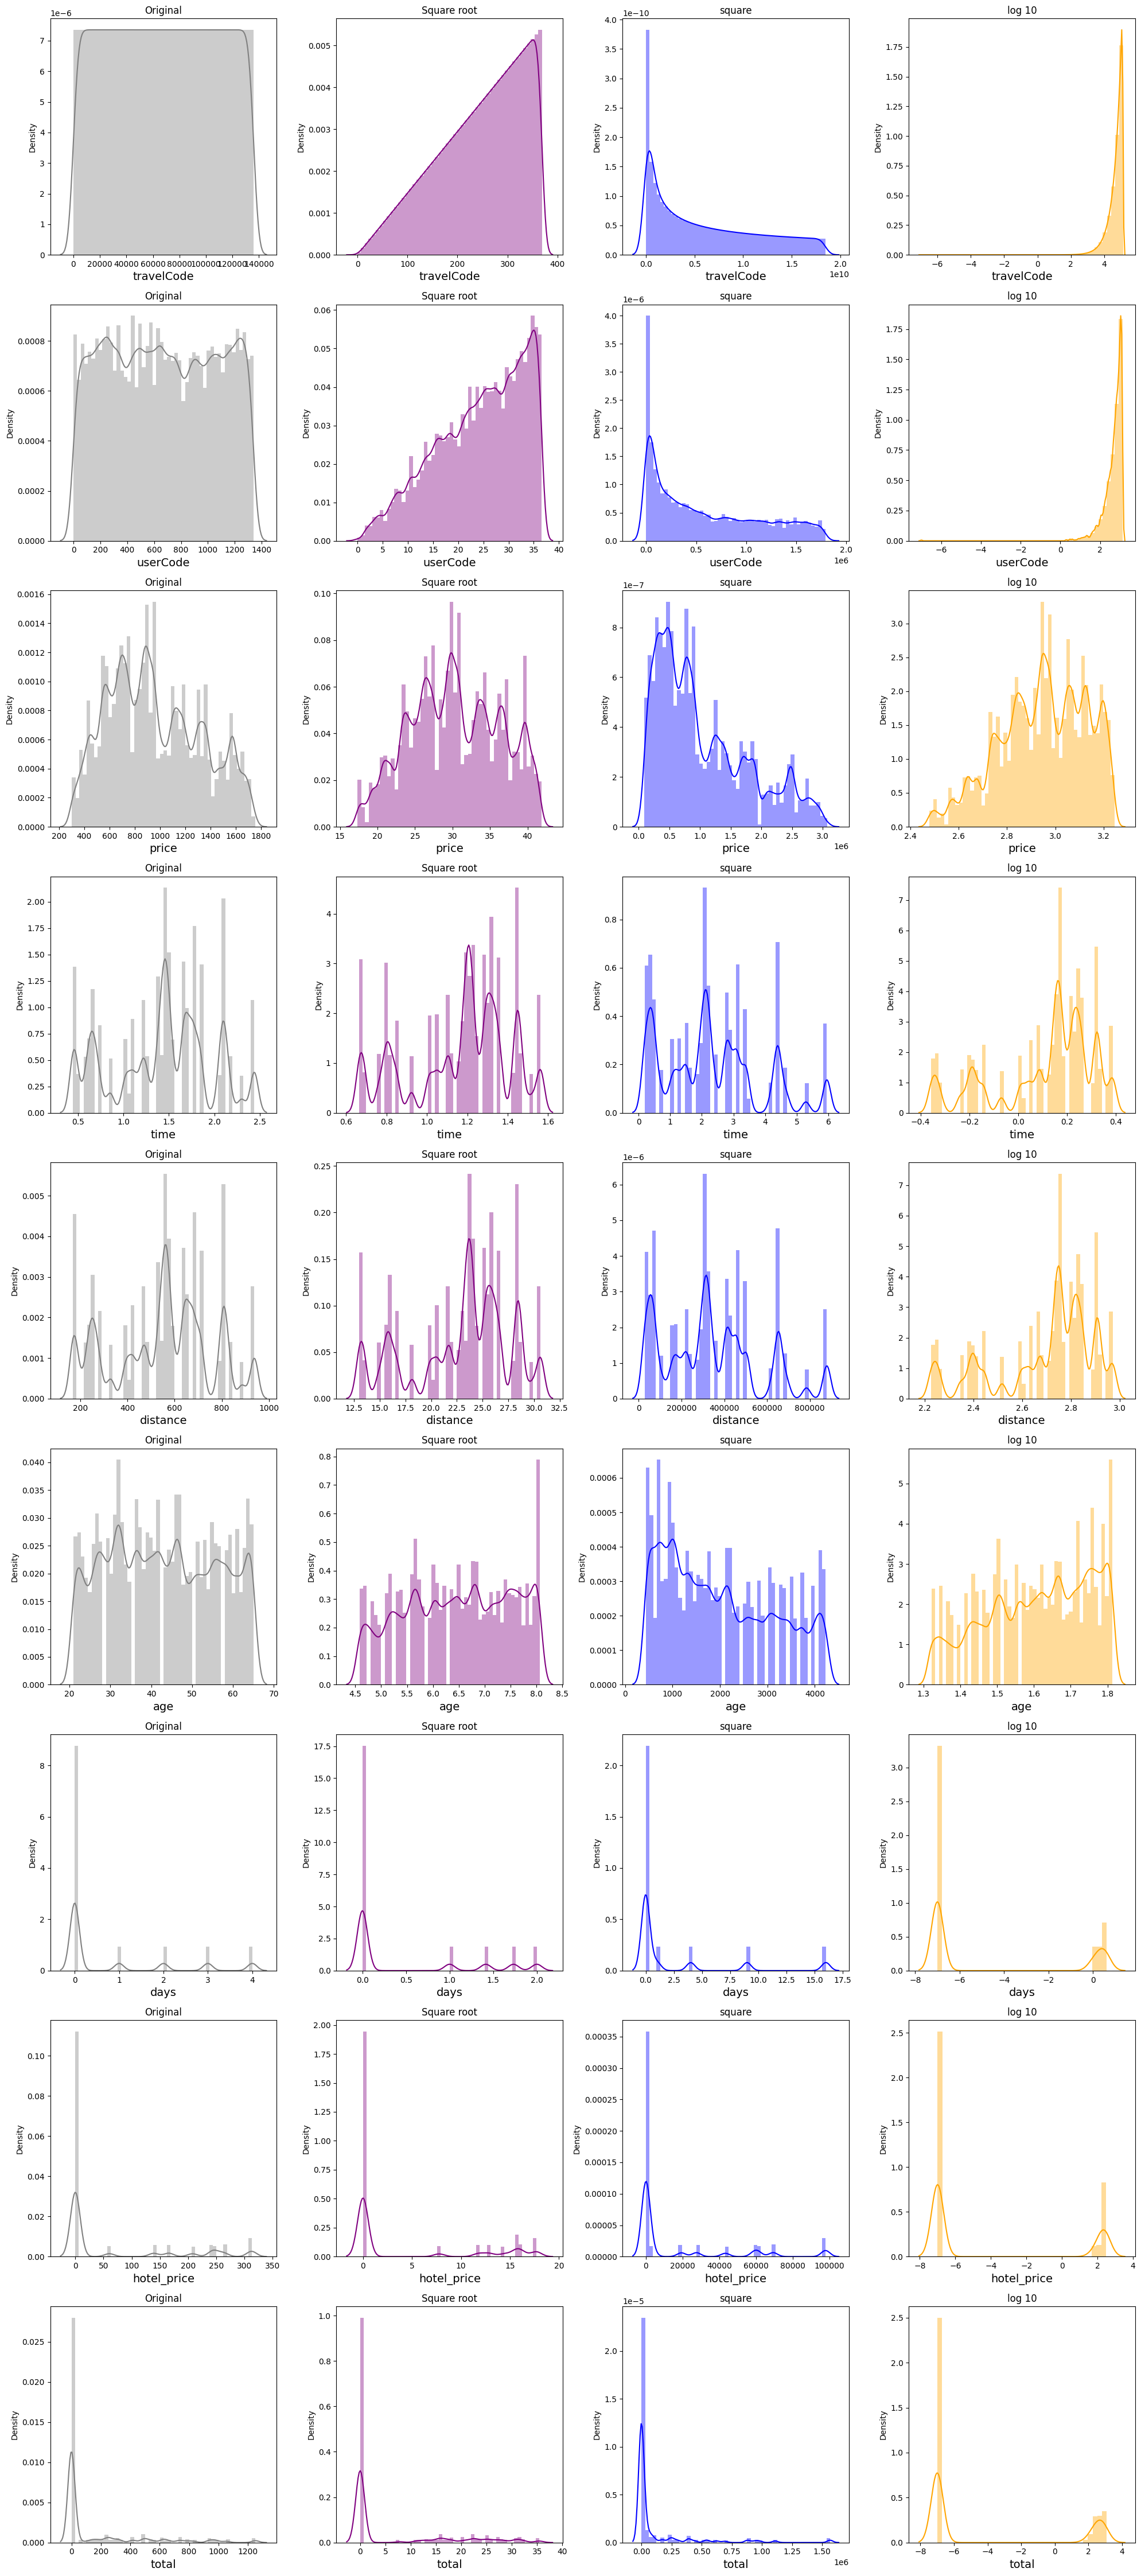

In [29]:
# Chart - 3 visualization code

# Checking best transformation for every numerical column in our dataset
fig, axes = plt.subplots(nrows=len(df.columns), ncols=4, figsize=(20, 5*len(df.columns)))
for i, col in enumerate(df.columns):
    sns.distplot((df[col]), ax=axes[i, 0], color='grey').set_title("Original") # Original column
    sns.distplot(np.sqrt(df[col]), ax=axes[i, 1], color='purple').set_title("Square root")  # applying Square root transformation
    sns.distplot(np.log10(df[col]+0.0000001), ax=axes[i, 3], color='orange').set_title("log 10")  # applying log transformation
    sns.distplot((df[col]**2), ax=axes[i, 2], color='blue').set_title("square")  # applying Square transformation
    axes[i, 0].set_xlabel(col, fontsize=14)
    axes[i, 1].set_xlabel(col, fontsize=14)
    axes[i, 2].set_xlabel(col, fontsize=14)
    axes[i, 3].set_xlabel(col, fontsize=14)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?



##### 2. What is/are the insight(s) found from the chart?


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


In [30]:
# Chart - 4 visualization code



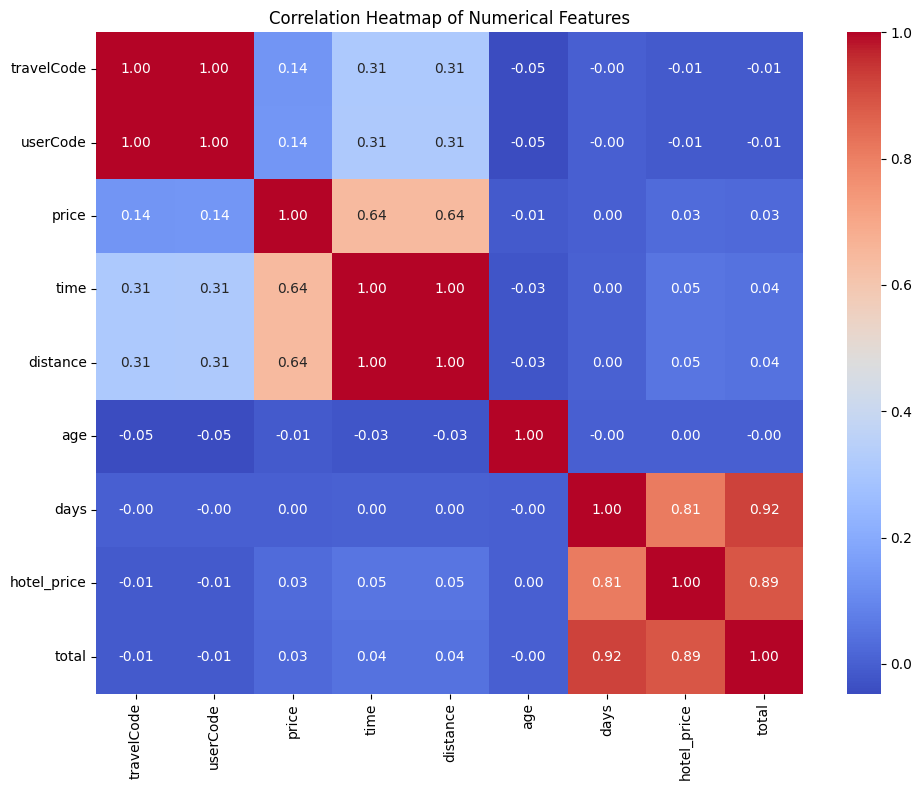

In [31]:
# Chart - 5 visualization code - Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is chosen to visualize the relationships between all numerical variables simultaneously. This chart type is highly effective for displaying the correlation matrix, where each cell shows the correlation coefficient between two variables. The color intensity and annotation (values) quickly highlight strong positive, negative, or weak correlations, providing a comprehensive overview of feature interdependencies.

Answer Here.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answer Here

Answer Here.

##### 2. What is/are the insight(s) found from the chart?


Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [33]:
# Chart - 3 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

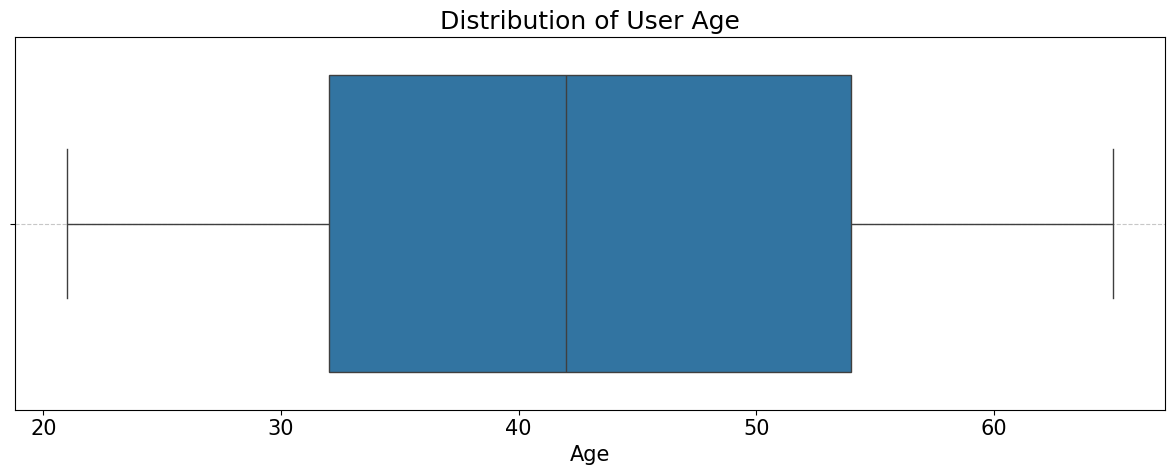

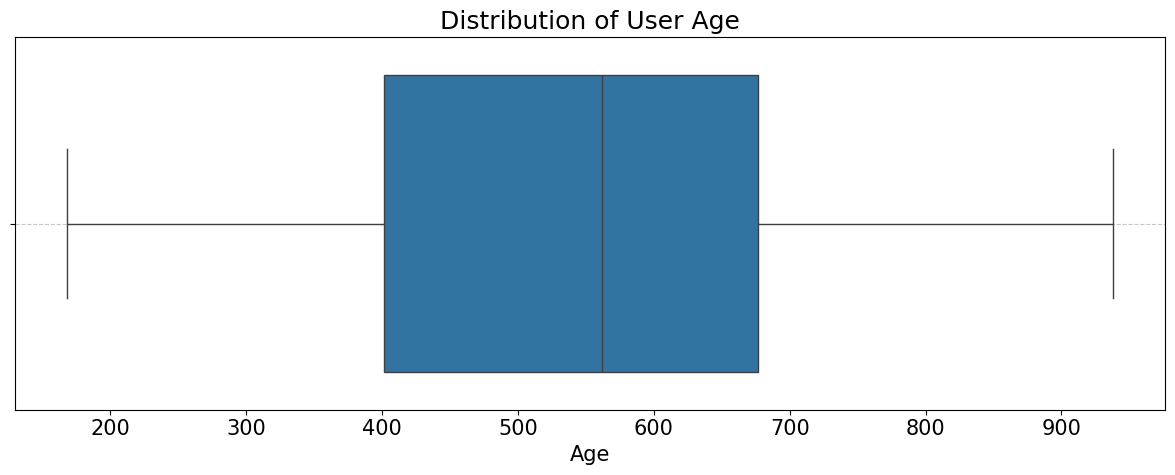

In [86]:
# Chart - 4 visualization code

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['age'])
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['distance'])
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
df

,travelCode,userCode,price,time,distance,age,days,hotel_price,total
0,0,0,1434.38,1.76,676.53,21,4.0,313.02,1252.08
1,0,0,1292.29,1.76,676.53,21,4.0,313.02,1252.08
2,1,0,1487.52,1.66,637.56,21,0.0,0.00,0.00
3,1,0,1127.36,1.66,637.56,21,0.0,0.00,0.00
4,2,0,1684.05,2.16,830.86,21,2.0,263.41,526.82
...,...,...,...,...,...,...,...,...,...
271883,135941,1339,1446.34,1.49,573.81,35,3.0,60.39,181.17
271884,135942,1339,726.95,1.84,709.37,35,4.0,242.88,971.52
271885,135942,1339,873.07,1.84,709.37,35,4.0,242.88,971.52
271886,135943,1339,313.62,1.21,466.30,35,0.0,0.00,0.00


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [36]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [37]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [38]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [39]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [40]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [41]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [42]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [43]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [44]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [45]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [46]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [50]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [51]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [52]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [53]:
# Expand Contraction

#### 2. Lower Casing

In [54]:
# Lower Casing

#### 3. Removing Punctuations

In [55]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [56]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [57]:
# Remove Stopwords

In [58]:
# Remove White spaces

#### 6. Rephrase Text

In [59]:
# Rephrase Text

#### 7. Tokenization

In [60]:
# Tokenization

#### 8. Text Normalization

In [61]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [62]:
# POS Taging

#### 10. Text Vectorization

In [63]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [64]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [65]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [66]:
# Transform Your data

### 6. Data Scaling

In [67]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [68]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [70]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [71]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [76]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [79]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [80]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

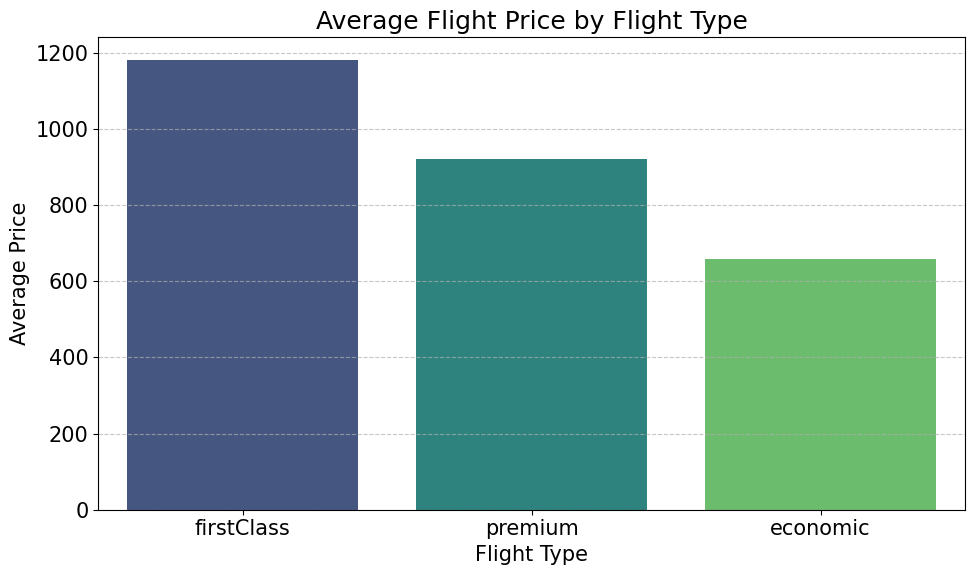

In [81]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average flight price by flightType
avg_price_by_flight_type = travel_data.groupby('flightType')['price'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_flight_type.index, y=avg_price_by_flight_type.values, palette='viridis')
plt.title('Average Flight Price by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Average Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Average Flight Price by Flight Type

### Subtask:
Visualize the average flight price for each 'flightType' using a bar chart to understand pricing differences between economic, firstClass, etc.


**Reasoning**:
First, I will calculate the average flight price for each unique flightType and store it in a DataFrame. This will prepare the data for visualization.



In [82]:
avg_price_by_flight_type = travel_data.groupby('flightType')['price'].mean().sort_values(ascending=False).reset_index()
print(avg_price_by_flight_type)

   flightType        price
0  firstClass  1181.067727
1     premium   920.392375
2    economic   658.443093


**Reasoning**:
Now, I will create a bar chart to visualize the average flight price per flight type, which is the main goal of this subtask. This will help understand pricing differences between economic, firstClass, and premium flight types.



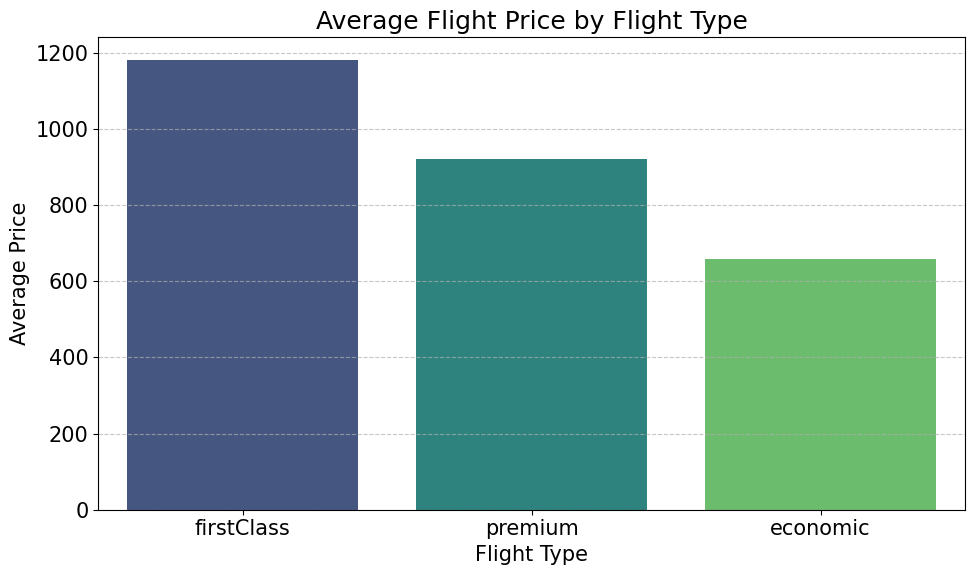

In [83]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='flightType', y='price', data=avg_price_by_flight_type, palette='viridis')
plt.title('Average Flight Price by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Average Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code failed because `avg_price_by_flight_type` was a pandas Series, but `sns.barplot` expects a DataFrame or Mapping for the `data` parameter. I will re-include the calculation of `avg_price_by_flight_type` and ensure it's a DataFrame using `reset_index()` before creating the bar chart.



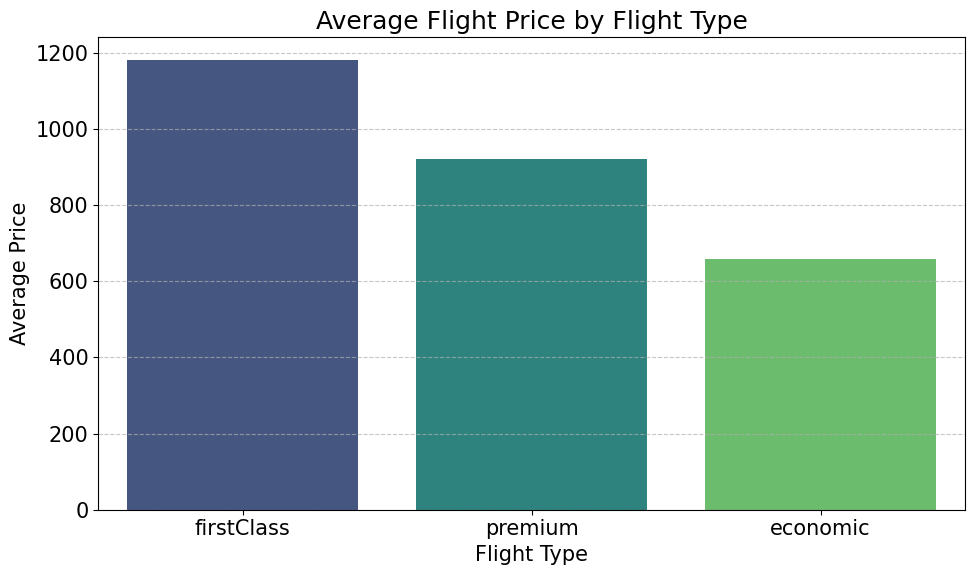

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average flight price by flightType and reset index to make it a DataFrame
avg_price_by_flight_type = travel_data.groupby('flightType')['price'].mean().sort_values(ascending=False).reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='flightType', y='price', data=avg_price_by_flight_type, palette='viridis')
plt.title('Average Flight Price by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Average Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an effective visualization for comparing categorical data, such as different `flightType` categories, against a numerical value, which in this case is the average flight `price`. It clearly shows the average price for each flight type, making it easy to identify differences and trends. The use of a palette (`viridis`) helps differentiate the bars visually.

##### 1. Why did you pick the specific chart?

A bar chart is an effective visualization for comparing categorical data, such as different `flightType` categories, against a numerical value, which in this case is the average flight `price`. It clearly shows the average price for each flight type, making it easy to identify differences and trends. The use of a palette (`viridis`) helps differentiate the bars visually.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart, the following insights can be observed:

*   **First Class flights are the most expensive**: The average price for 'firstClass' is significantly higher than both 'premium' and 'economic' flights.
*   **Economic flights are the least expensive**: As expected, 'economic' flights have the lowest average price.
*   **Premium flights offer a middle-ground**: 'Premium' flights are priced between 'firstClass' and 'economic' options, providing a choice for travelers seeking a balance between cost and amenities.

These insights highlight a clear pricing hierarchy among different flight types, which is a fundamental aspect of the travel industry.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart, the following insights can be observed:

*   **First Class flights are the most expensive**: The average price for 'firstClass' is significantly higher than both 'premium' and 'economic' flights.
*   **Economic flights are the least expensive**: As expected, 'economic' flights have the lowest average price.
*   **Premium flights offer a middle-ground**: 'Premium' flights are priced between 'firstClass' and 'economic' options, providing a choice for travelers seeking a balance between cost and amenities.

These insights highlight a clear pricing hierarchy among different flight types, which is a fundamental aspect of the travel industry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1.  **Targeted Marketing**: Airlines can tailor marketing campaigns to specific customer segments. For budget travelers, promotions can focus on economic flights. For luxury travelers, first-class benefits can be highlighted.
2.  **Product Development**: Understanding price sensitivity across flight types can inform the development of new premium or economic offerings. For example, if there's high demand for premium services at a slightly lower price point than first-class, new premium economy options could be explored.
3.  **Revenue Management**: The clear pricing tiers allow for optimized revenue management. Dynamic pricing strategies can be implemented to adjust prices based on demand for each flight type, maximizing profit.
4.  **Competitive Advantage**: By analyzing competitor pricing for each flight type, airlines can strategically position their own offerings to gain a competitive edge, either by offering more value in a specific tier or by adjusting prices to be more attractive.

**Insights that Lead to Negative Growth (if not managed well):**

1.  **Over-reliance on Economic Fares**: While economic flights are the most popular, an over-reliance on them could lead to lower profit margins if not enough premium or first-class seats are sold. This could negatively impact overall profitability if not balanced with higher-yield options.
2.  **Misjudging Premium Market Demand**: If the airline invests heavily in first-class offerings without sufficient demand, it could lead to underutilized capacity and financial losses. The high price point of first-class means its market segment is smaller and more exclusive.
3.  **Price Wars in Economic Class**: Intense competition in the economic flight segment can drive down prices, eroding profit margins for all airlines. Without differentiating factors, this could lead to a race to the bottom, negatively impacting growth.

In summary, the insights provide a clear understanding of customer segments and their willingness to pay for different flight types, which can be leveraged for strategic business decisions. However, these insights also highlight the need for careful management of capacity and pricing strategies across all segments to ensure sustainable growth.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1.  **Targeted Marketing**: Airlines can tailor marketing campaigns to specific customer segments. For budget travelers, promotions can focus on economic flights. For luxury travelers, first-class benefits can be highlighted.
2.  **Product Development**: Understanding price sensitivity across flight types can inform the development of new premium or economic offerings. For example, if there's high demand for premium services at a slightly lower price point than first-class, new premium economy options could be explored.
3.  **Revenue Management**: The clear pricing tiers allow for optimized revenue management. Dynamic pricing strategies can be implemented to adjust prices based on demand for each flight type, maximizing profit.
4.  **Competitive Advantage**: By analyzing competitor pricing for each flight type, airlines can strategically position their own offerings to gain a competitive edge, either by offering more value in a specific tier or by adjusting prices to be more attractive.

**Insights that Lead to Negative Growth (if not managed well):**

1.  **Over-reliance on Economic Fares**: While economic flights are the most popular, an over-reliance on them could lead to lower profit margins if not enough premium or first-class seats are sold. This could negatively impact overall profitability if not balanced with higher-yield options.
2.  **Misjudging Premium Market Demand**: If the airline invests heavily in first-class offerings without sufficient demand, it could lead to underutilized capacity and financial losses. The high price point of first-class means its market segment is smaller and more exclusive.
3.  **Price Wars in Economic Class**: Intense competition in the economic flight segment can drive down prices, eroding profit margins for all airlines. Without differentiating factors, this could lead to a race to the bottom, negatively impacting growth.

In summary, the insights provide a clear understanding of customer segments and their willingness to pay for different flight types, which can be leveraged for strategic business decisions. However, these insights also highlight the need for careful management of capacity and pricing strategies across all segments to ensure sustainable growth.

## Average Flight Price by Agency (Bar Chart)

### Subtask:
Re-visualize the average flight price per 'agency' using a bar chart for easier comparison between agencies.


**Reasoning**:
First, I will calculate the average flight price for each unique 'agency' and store it in a DataFrame. This will prepare the data for visualization by grouping the `travel_data` by 'agency' and computing the mean 'price', then sorting the results.



In [85]:
avg_price_by_agency = travel_data.groupby('agency')['price'].mean().sort_values(ascending=False).reset_index()
print(avg_price_by_agency)

        agency        price
0  FlyingDrops  1186.160378
1      Rainbow   919.780760
2      CloudFy   918.896483
